# Regression 
## predict salary of an employee using the employee's experience

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### Exploratory Data Analysis (EDA)

In [7]:
# get the df general information
# since this data set has all numeric features, we dont have to deal with data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           33 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 660.0 bytes


In [6]:
# check how many NA records are present
# since this df does not have any NA records, we dont have to deal with them
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

#### figure out the independent features

In [11]:
# use statistical measures: covariance
np.cov(df['YearsExperience'], df['Salary'])

# the output indicates:
# row1: [cov(df['YearsExperience'], df['YearsExperience']), cov(df['YearsExperience'], df['Salary'])
# row2: [cov(df['Salary'], df['YearsExperience']), cov(df['Salary'], df['Salary'])

array([[1.11717235e+01, 1.11831181e+05],
       [1.11831181e+05, 1.15699444e+09]])

In [13]:
# use correlation
np.corrcoef(df['YearsExperience'], df['Salary'])

# the output indicates:
# row1: [cor(df['YearsExperience'], df['YearsExperience']), cor(df['YearsExperience'], df['Salary'])
# row2: [cor(df['Salary'], df['YearsExperience']), cor(df['Salary'], df['Salary'])

array([[1.        , 0.98364228],
       [0.98364228, 1.        ]])

Text(0.5, 1.0, 'Experience vs Salary')

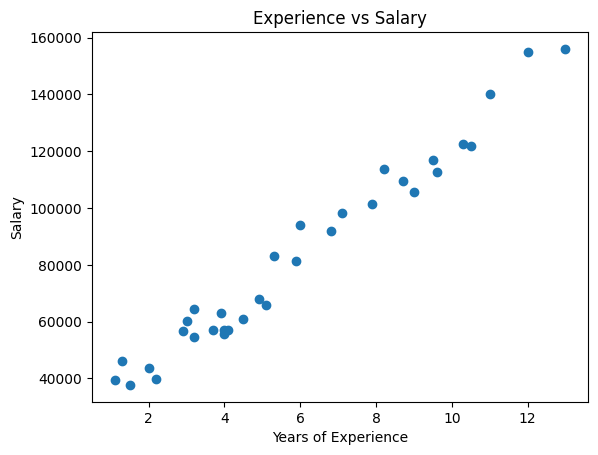

In [16]:
# use visualization
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

Text(0.5, 1.0, 'Experience vs Salary')

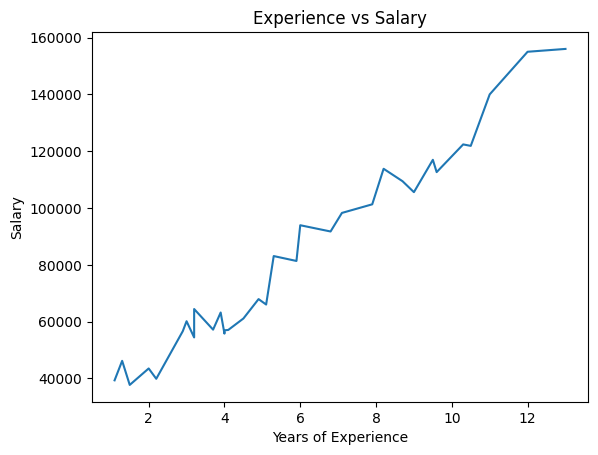

In [17]:
# use visualization
plt.plot(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

Text(0.5, 1.0, 'Experience vs Salary')

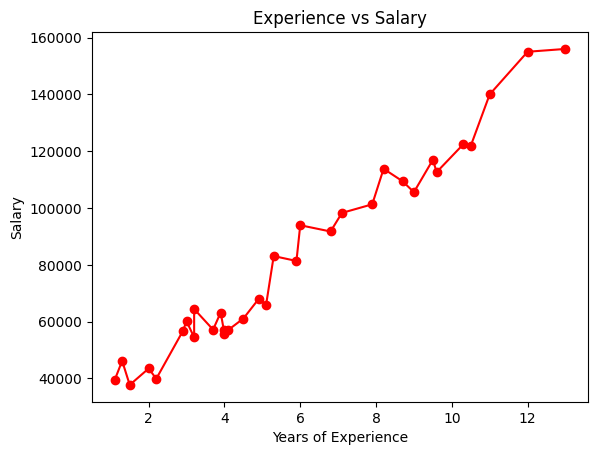

In [20]:
# use visualization
plt.scatter(df['YearsExperience'], df['Salary'], color="red")
plt.plot(df['YearsExperience'], df['Salary'], color="red")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

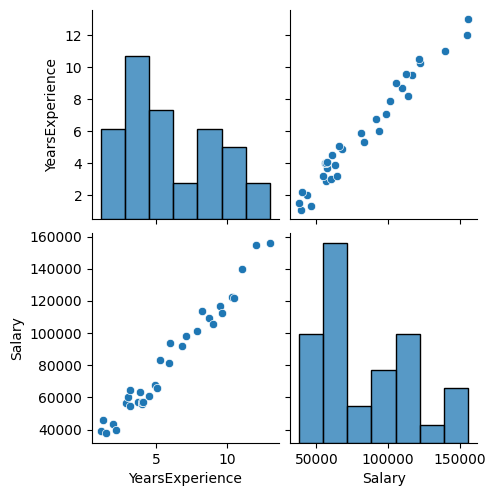

In [21]:
# use visualization
sns.pairplot(df)

### prepare the data for regression

In [29]:
# decide the x and y from dataset

# x must be a 2d collection (df or array)
x = df.drop('Salary', axis=1)

# y must be 1d collection (array or series)
y = df['Salary']

In [24]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

### train the model

In [71]:
from sklearn.linear_model import LinearRegression

# create an object of model
model = LinearRegression()

# train the model using the train data set
model.fit(x, y)

LinearRegression()

In [66]:
# the model uses the y = mx + c formula to predict the values

# this is the coefficient of x (YearsExperience)
model.coef_

array([9832.28558383])

In [67]:
# this is the constant value
model.intercept_

24043.39574796879

In [70]:
# so the formula will become
# y = mx + c => 9832.28 * YearxExperience + 24043.39
# predict salary of an employee having experiece 16
predicted_salary = 9832.28 * 16 + 24043.39
predicted_salary

181359.87

In [69]:
# predict salary of an employee having experiece 16
model.predict([[16]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([181359.96508933])

### model evaluation

In [35]:
# predit the salaries for test data
y_pred = model.predict(x_test)

# consider the given y_test values as true values
y_true = y_test

#### mean absolute error

In [36]:
from sklearn.metrics import mean_absolute_error

# calculate the error
mae = mean_absolute_error(y_true, y_pred)
mae

4626.385857781732

#### mean squared error

In [37]:
from sklearn.metrics import mean_squared_error

# calculate the error
mse = mean_squared_error(y_true, y_pred)
mse

31886658.198734988

#### root mean squared error

In [40]:
from sklearn.metrics import root_mean_squared_error

# rmse is just a square root of mse
# np.sqrt(mse)

rmse = root_mean_squared_error(y_true, y_pred)
rmse

5646.827268363624

#### R2 score

In [42]:
from sklearn.metrics import r2_score

# the R2 score will lie between 0 and 1
# 0: the model is performing poor, giving the prediction as same as mean value
# 1: the model is performing best giving the most accurate answer  

# calculate the R-squared value
r2 = r2_score(y_true, y_pred)
r2

0.9753126345282958

#### adjusted R2 score

In [43]:
# to penalize the new featured added we use the adjusted-R2 score

# number of values in the data set
n = y_true.size

# number of featured
k = 1

adjusted_r2 = 1 - ((1-r2) * ((n - 1) / (n - (k + 1))))
adjusted_r2

0.9722267138443327

### result visualization

Text(0.5, 1.0, 'Salary Prediction')

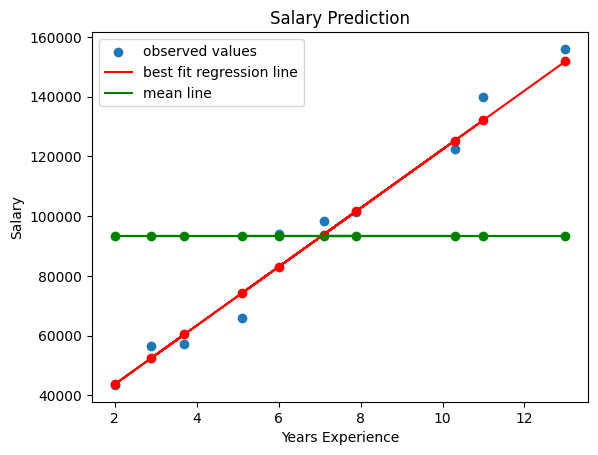

In [60]:
# observed values
plt.scatter(x_test['YearsExperience'], y_test, label="observed values")

# predicted values
plt.scatter(x_test['YearsExperience'], y_pred, color="red")
plt.plot(x_test['YearsExperience'], y_pred, color="red", label="best fit regression line")

# mean line
mean_salary = np.mean(y_true)
mean_values = np.ones(y_true.size) * mean_salary
plt.scatter(x_test['YearsExperience'], mean_values, color="green")
plt.plot(x_test['YearsExperience'], mean_values, color="green", label="mean line")

# add a legend
plt.legend()

plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')

### prediction

In [32]:
# predict salary of an employee having 20, 24, 26, and 30 years of experience
# the prediction method expects a 2d collection (array or df)
prediction = model.predict([[20], [24], [26], [30], [4], [1.5]])
prediction

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([220689.10742466, 260018.24976   , 279682.82092767, 319011.96326301,
        63372.53808331,  38791.82412372])

### save the model

In [78]:
# %pip install pickle4
import pickle 

with open("salary_prediction_model.pkl", "wb") as file:
    # serialize the model to a file
    pickle.dump(model, file)
